In [1]:
import torch
import numpy as np
import os
from skimage import io
from torchvision import transforms
from FishModel import FishModel


transform = transforms.Resize((256, 256))

model = FishModel()
model.load_state_dict(torch.load('Models/best.pt', map_location=torch.device('cpu')))
model.to("cpu")

embeddings = []

for file in os.listdir("Images/References"):
    img = io.imread(os.path.join("Images/References", file))
    img = torch.from_numpy(img).permute(2,0,1) / 255.0
    img = transform(img).unsqueeze(0)

    # Get the embeddings
    emb = model(img)

    embeddings.append(emb.detach().numpy())

correct = 0
total = 0

actual_classes = []
predicted_classes = []

# For each file in the "Images/Test" folder, predict the class
for file in os.listdir("Images/Validationset"):
    img = io.imread(os.path.join("Images/Validationset", file))
    img = torch.from_numpy(img).permute(2,0,1) / 255.0
    img = transform(img).unsqueeze(0)

    # Get the embeddings
    emb = model(img)

    # Calculate the euclidean distance between the embeddings of the test image and the reference images
    distances = [np.linalg.norm(emb.detach().numpy() - e) for e in embeddings]

    # Get the index of the reference image with the smallest distance
    pred = np.argmin(distances)

    # Get the class of the reference image
    pred_class = pred + 1
    
    # Get the class of the test image
    actual_class = int(file.split("_")[0])

    # If the predicted class is the same as the actual class, increment the correct counter
    if pred_class == actual_class:
        correct += 1

    total += 1

    actual_classes.append(actual_class)
    predicted_classes.append(pred_class)

    # print(f"Predicted class: {pred +1 }, Distance: {distances}, File: {file}")

print(f"Accuracy: {correct/total * 100:.2f}%")
# Average accuracy: 67.50%

C:\Users\kjell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\kjell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing).

Accuracy: 67.50%


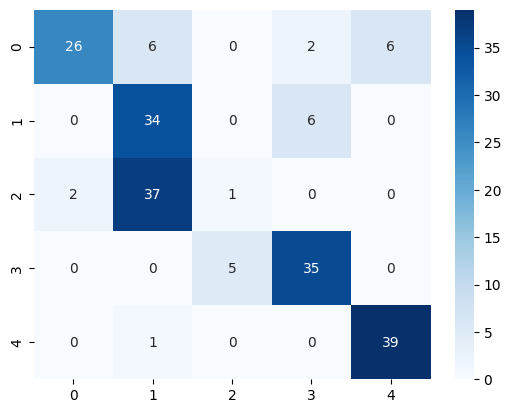

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn

matrix = confusion_matrix(actual_classes, predicted_classes)

heatmap = seaborn.heatmap(matrix, annot=True, fmt='g', cmap='Blues')

figure = heatmap.get_figure()
figure.savefig("cm_fulldataset.png", dpi=400)

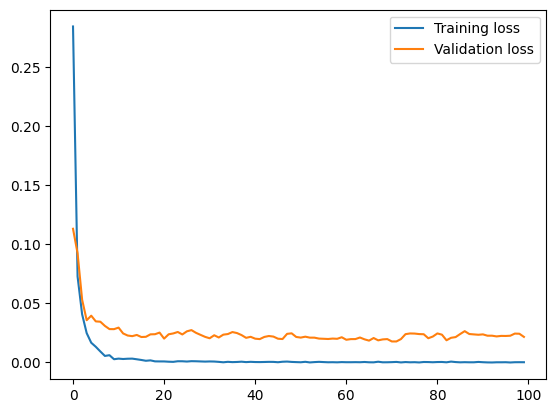

In [1]:
# Plot the training loss and validation loss stored in loss.txt on the format (training loss, validation loss)
import matplotlib.pyplot as plt

with open("loss.txt", "r") as f:
    lines = f.readlines()

lines = [line.split(",") for line in lines]

training_losses = [float(loss[0]) for loss in lines]
validation_losses = [float(loss[1]) for loss in lines]

plt.plot(training_losses, label="Training loss")

plt.plot(validation_losses, label="Validation loss")

plt.legend()

plt.savefig("loss_resnet.png", dpi=400)

plt.show()